## Titanic EDA - Multivariate

In [2]:
import os
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import statistics as stats
import numpy as np
#from sklearn_pandas import CategoricalImputer

from IPython.display import display, HTML
%matplotlib inline

In [3]:
os.chdir('/Users/suma/Documents/01 Data Science/Titanic Problem/')
df_train = pd.read_csv('titanic_train.csv')
df_train.head(10)
df_train.info()
#display(HTML(df_train.to_html())) - To display full dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survived       891 non-null int64
Ticket         891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
def extract_title(name):
     return name.split(',')[1].split('.')[0].strip()
df_train['Title'] = df_train['Name'].map(extract_title)

In [5]:
df_train['Age'].count()
df_train.count()

PassengerId    891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Fare           891
Cabin          204
Embarked       889
Survived       891
Ticket         891
Title          891
dtype: int64

In [6]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### Missing Value Handling

Following columns have missing values
Age: 177
Cabin: 687
Embarked: 2


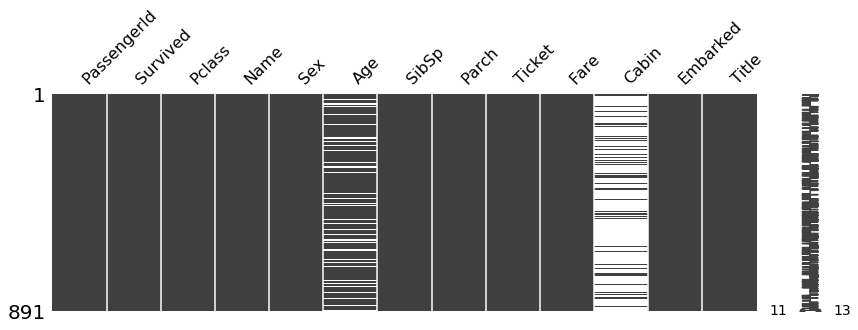

In [6]:
frame_length = len(df_train)
print('Following columns have missing values')
for col in df_train.columns:
    diff = frame_length - df_train[col].count()
    if diff != 0:
        print(col + ': ' + str(diff))
        
msno.matrix(df_train, figsize = (14, 4), width_ratios=(15,1))

#### Imputing missing values of Age column based on Title column mean ages

In [7]:
df_train.groupby("Title").mean()['Age']
df_train["Age"] = df_train.groupby("Title").transform(lambda x: x.fillna(x.mean()))['Age']

#### Imputing missing values of Embarked: mode - most frequent value of Embarked column

In [8]:
cat_imputer = CategoricalImputer()
df_train['Embarked'] = cat_imputer.fit_transform(df_train['Embarked'])

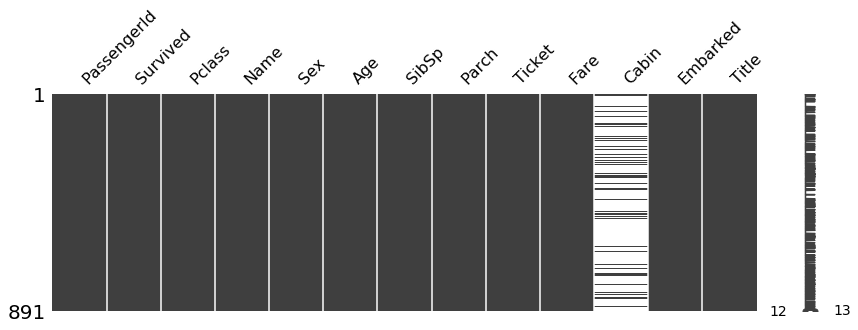

In [9]:
msno.matrix(df_train, figsize = (14,4), width_ratios = (15,1))

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


#### Bivariate EDA - Pairwise Numeric - Numeric Relationships

#### Label Encoding of Categorical fields
#### One-Hot Encoding not required - as random forest model (used below) internally runs a decision tree

In [11]:
le = preprocessing.LabelEncoder()
df_train['Title'] = le.fit_transform(df_train['Title']) 
df_train['Sex'] = le.fit_transform(df_train['Sex']) 
df_train['Pclass'] = le.fit_transform(df_train['Pclass']) 
df_train['Embarked'] = le.fit_transform(df_train['Embarked']) 

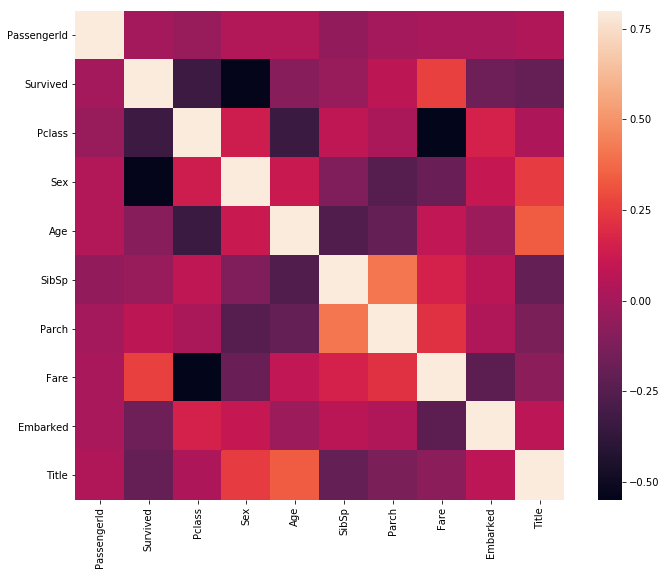

In [12]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

### Target Variable - Correlation Matrix of top (k) correlated variables

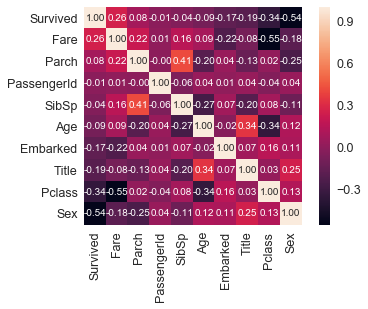

In [13]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

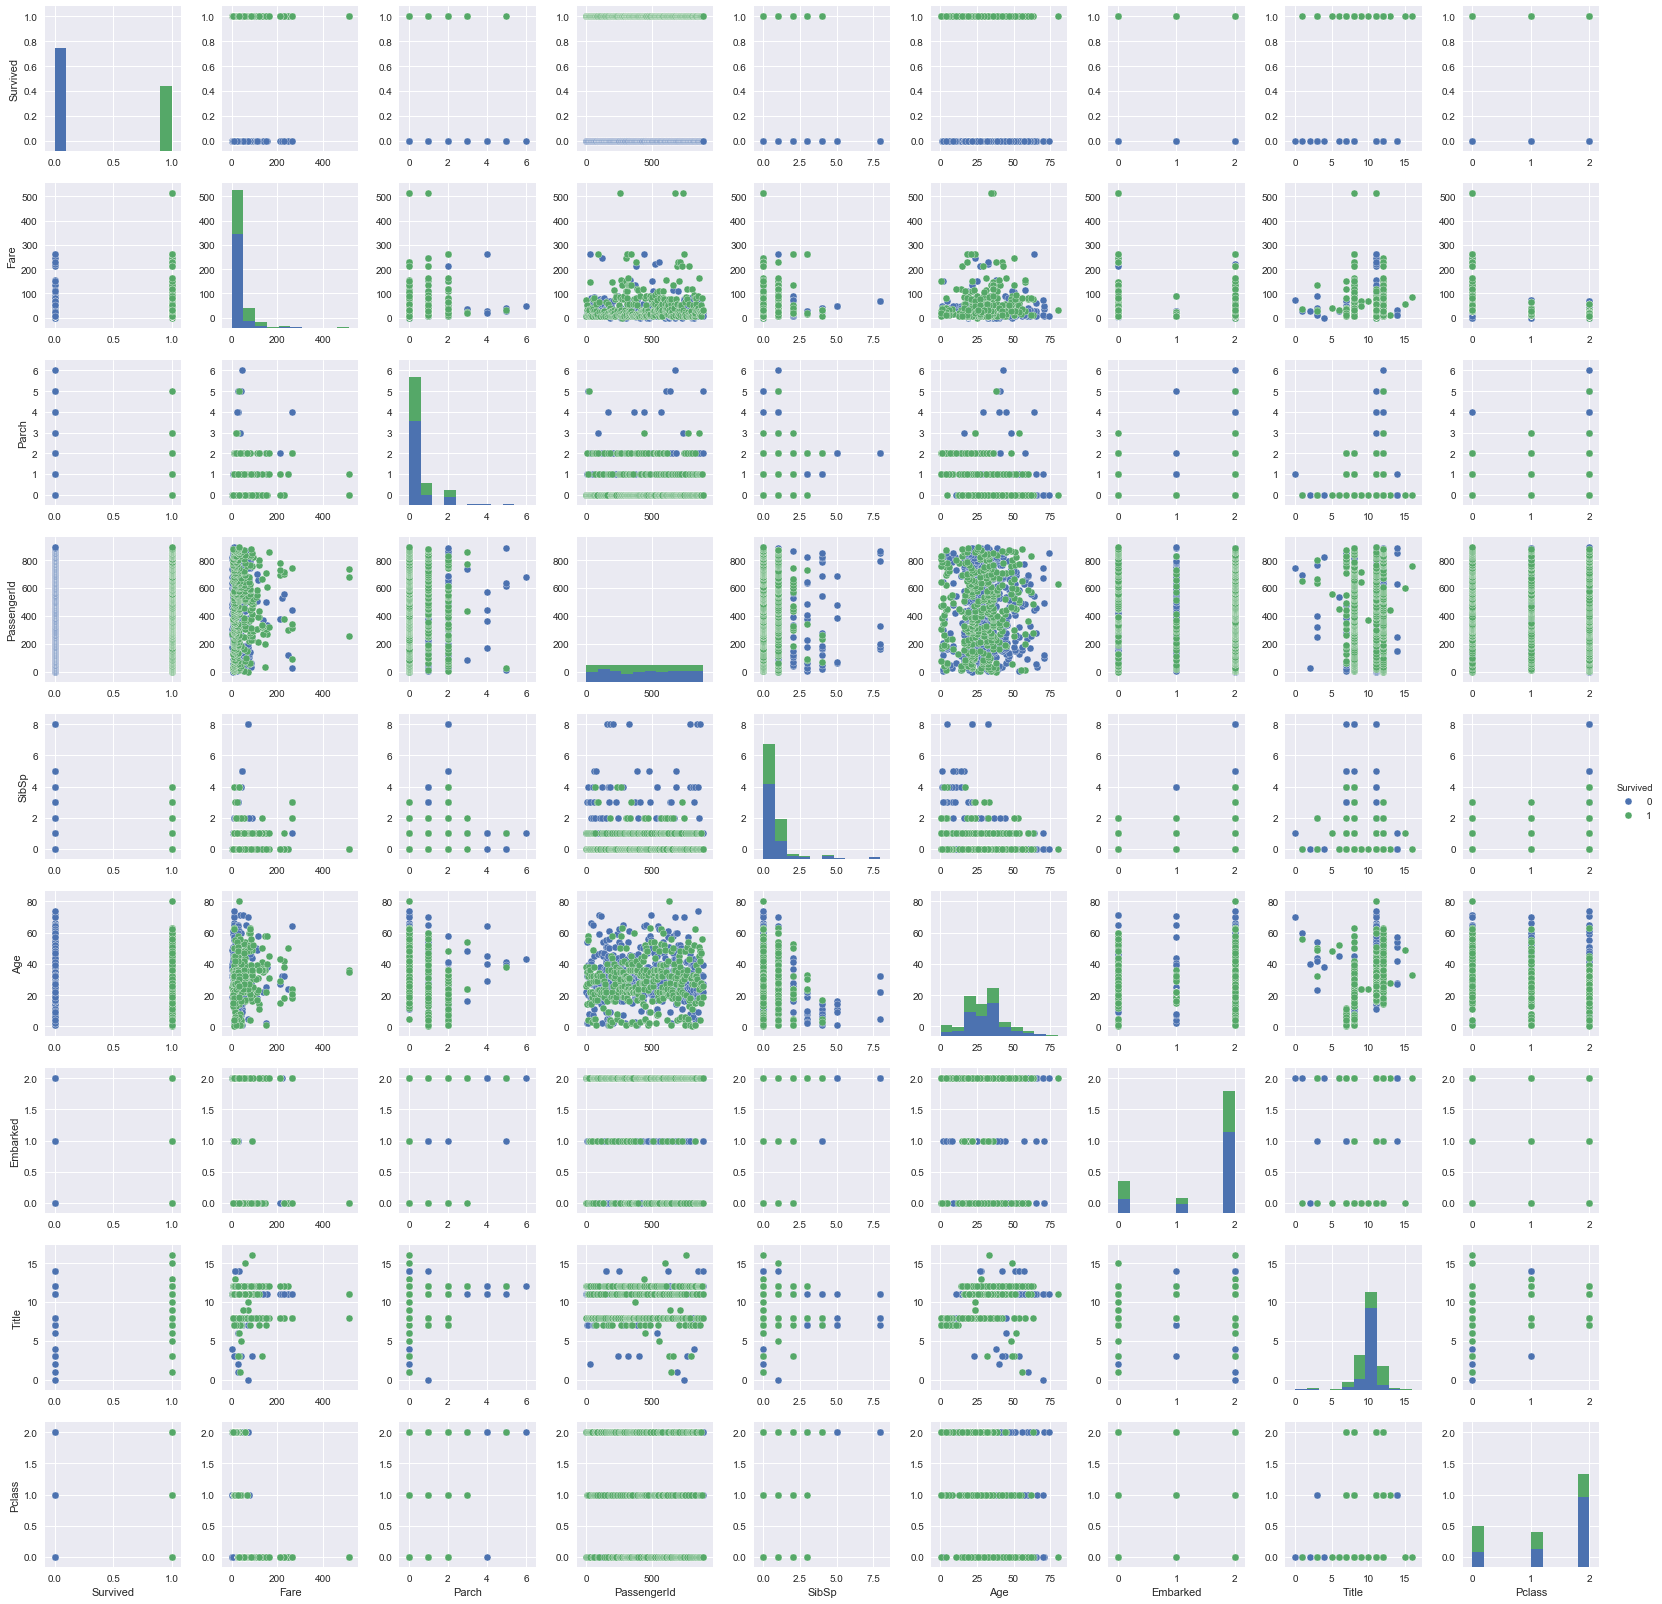

In [12]:
sns.set()
k = 9
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
sns.pairplot(df_train[cols], size = 2.5, hue = 'Survived')

In [13]:
X_cols = ['Pclass', 'Sex', 'Embarked', 'Title', 'Age', 'Fare', 'Parch', 'SibSp']
y_col = 'Survived'

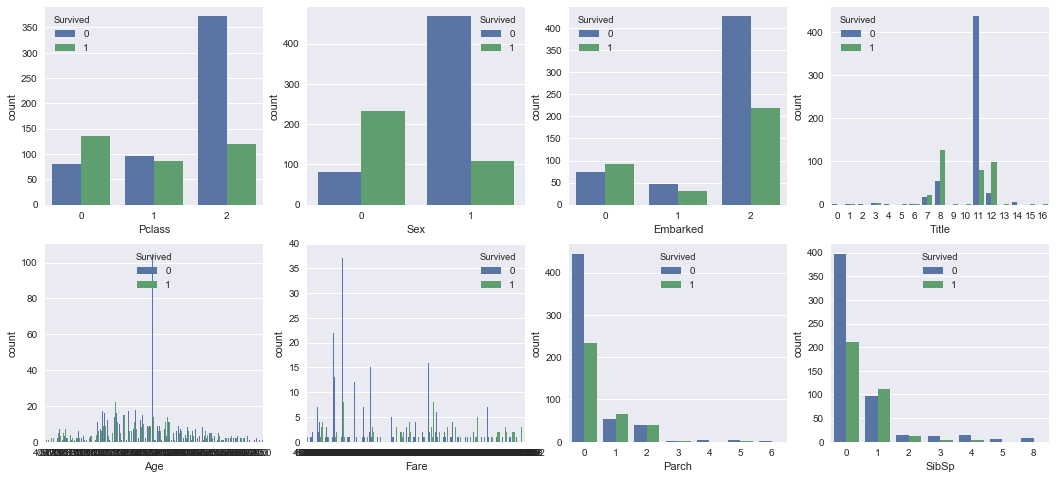

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize = (18,8))
i = 0
j = 0 
for col in list(X_cols):   
    sns.factorplot(x= col, hue= y_col, data=df_train, kind = 'count', ax = axs[i, j%4])
    plt.close()
    j = j + 1
    i = j // 4
    

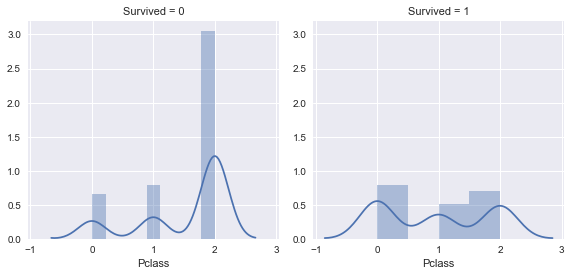

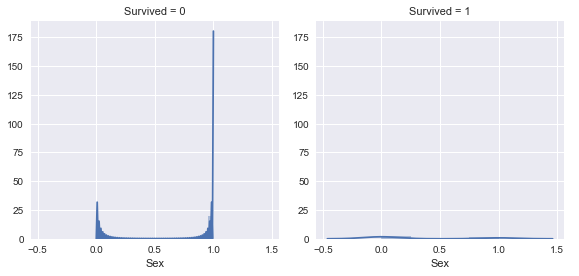

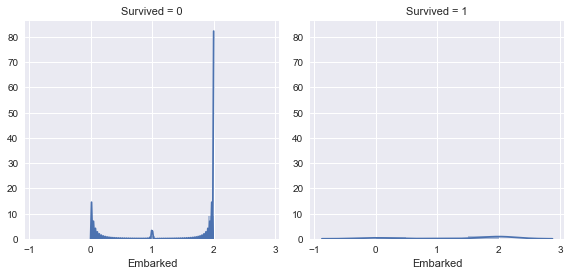

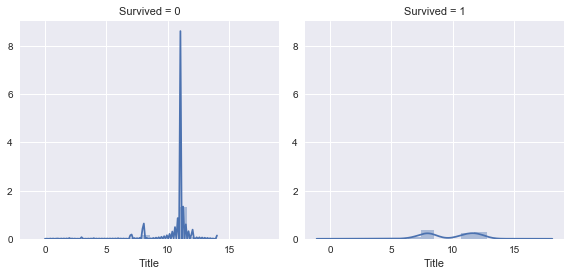

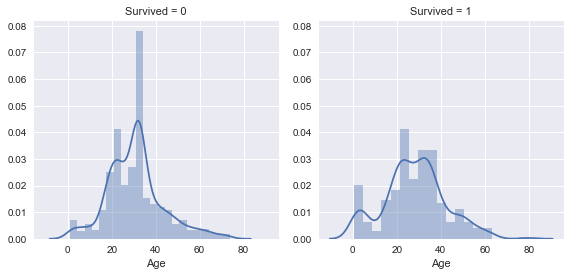

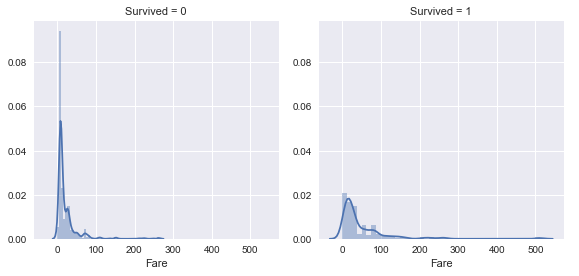

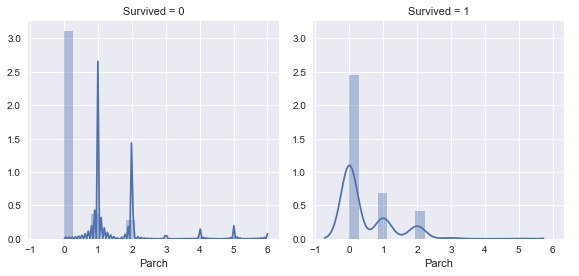

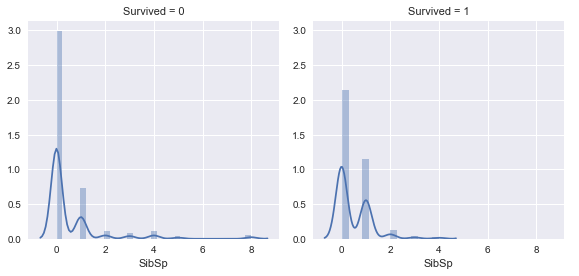

In [15]:
for col in list(X_cols):  
    #fg = sns.FacetGrid(df_train, hue = "Survived")
    #fg.map(sns.kdeplot, col, bw = 4).add_legend()
    fg = sns.FacetGrid(df_train, col = "Survived", size = 4)
    fg.map(sns.distplot, col).add_legend()
    #plt.close()

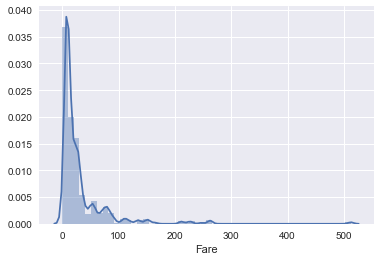

In [16]:
sns.distplot(df_train['Fare'])

In [17]:
df_train.loc[df_train['Fare'] == 0, 'Fare'] = 0.001
df_train['Fare1'] = np.log(df_train['Fare'])

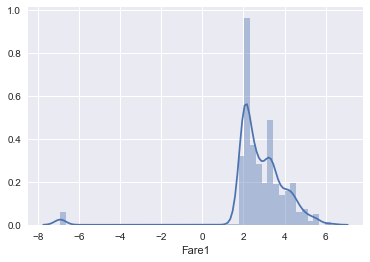

In [18]:
sns.distplot(df_train['Fare1'])

In [213]:
#sns.distplot(df_train['Fare'])
#fig = plt.figure()
#res = stats.probplot(df_train['Fare'], plot=plt)